<a href="https://colab.research.google.com/github/Seeeeiu/Python/blob/master/Analysis_with_KNN_and_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LP: MNIST Analysis with KNN and PCA

## A. Looking at the data

The MNIST data can be easily loaded in from sklearn.  There is also a Kaggle competition to test your machine learning skills! 

In [0]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


The components of the data set are available:

The dimensions of the X and y values can be given to us by shape:

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
train_images[2,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [0]:
train_labels.shape

(60000,)

## B. View a number

We will use the 'imshow' function within matplotlib.pyplot to view the number.

In [0]:
import matplotlib
import matplotlib.pyplot as plt

Let's choose an observation and verify if the target matches. 

In [0]:
ind=2
some_digit = train_images[ind]
some_digit_image = some_digit.reshape(28,28)

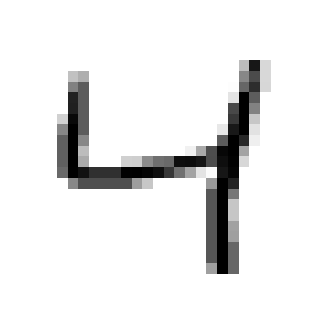

In [0]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [0]:
train_labels[ind]

4

When we set ind to 2 the handwritten digit looks like a 4 which matches the target value.

## C. Test a kNN classifier

Here we try out a kNN classifier.

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

After creating the knn object, we need to reshape the 3d object to 2 dimensions.

In [0]:
nsamples, nx, ny = train_images.shape
train_images_v2 = train_images.reshape((nsamples,nx*ny))

In [0]:
knn.fit(train_images_v2,train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

Reshape the test data set as well.

In [0]:
nsamples, nx, ny = test_images.shape
test_images_v2 = test_images.reshape((nsamples,nx*ny))

## <font color='red'>DON'T RUN THIS:<font>
<font color='red'>RUN TIME: ~19.95 minutes</font>

In [0]:
import time as t
now=t.time()
pred = knn.predict(test_images_v2)
elapsed = t.time()-now
elapsed

1025.8234243392944

Report accuracy:

In [0]:
sum(pred==test_labels)/len(test_labels)

0.9688

## D. Apply PCA

We will import and use PCA here.  It is necessary to specify the number of components when using the PCA function.  The number of components should be less than the number of features.  In fact, the number of components will determine the number of the new features.  Let's first try to specify 10.

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(train_images_v2)

How much variance is retained?

In [0]:
pca.explained_variance_ratio_

array([0.09704664, 0.07095924, 0.06169089, 0.05389419, 0.04868797,
       0.04312231, 0.0327193 , 0.02883886, 0.02762029, 0.0235697 ])

In [0]:
sum(pca.explained_variance_ratio_)

0.48814939280832115

There is a special way of telling the PCA function to retain 95% of the variance.  That is, instead of writing the n_components equal to an integer, make it the amount of variance you want retained.

In [0]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(train_images_v2)
X_test_pca = pca.transform(test_images_v2)

Notice that we did not use the fit_transform twice.  You first fit the transform using training data and then use that fit on the test set.

In [0]:
knn = KNeighborsClassifier()
knn.fit(X_train_pca, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

## <font color='red'>DON'T RUN THIS:<font>

<font color='red'>RUN TIME: ~7 minutes</font>

In [0]:
now=t.time()
y_pred = knn.predict(X_test_pca)
elapsed = t.time()-now
elapsed

195.1857340335846

In [0]:
sum(y_pred==test_labels)/len(test_labels)

0.9712

Note that we get about 97% for both cases.